## Unveiling Oceanic Dynamics: Machine Learning Insights into Salinity Variation and Ecosystem Response

The exploration of salinity levels in oceanic environments is fundamental in understanding the intricate dynamics of the water cycle, ocean circulation, and their implications for climate change. Salinity serves as a crucial parameter, influencing the density of seawater and thus shaping its movement and mixing patterns. The variations in salinity directly impact marine ecosystems, as many organisms have evolved to thrive within specific salinity ranges, affecting their distribution, reproduction, and overall survival.

The Conductivity, Temperature, and Depth (CTD) casts—a suite of electronic instruments is used to measure various oceanographic properties, including salinity, dissolved oxygen, chlorophyll-a, and nutrients. These measurements provide a comprehensive overview of the physical characteristics of seawater, aiding in charting its distribution and variations. 

The dataset used in this study originates from the CalCOFI dataset, representing one of the longest and most extensive time series of oceanographic and larval fish data globally. Collected from over 50,000 sampling stations, this dataset offers a wealth of information on oceanographic conditions, measured through CTD casts conducted at CalCOFI stations.

In this investigation, the objective is to develop a machine learning model capable of estimating water salinity based on biochemical oceanographic measurements and the year of measurement. By harnessing the power of machine learning, the aim is to uncover the intricate relationships between various oceanographic parameters and salinity levels, contributing to a deeper understanding of marine ecosystems and their response to environmental changes.

Dataset features:
1. Salnty: Salinity (Practical Salinity Scale 1978) (outcome)
2. Depthm: cast depth in meters
3. O2mlL: Milliliters oxygen per liter of seawater
4. STheta: Potential Density (Sigma Theta), Kg/M3
5. O2Sat: Oxygen percent saturation
6. Oxyµmol/Kg: Oxygen micromoles per kilogram seawater
7. ChlorA: Migrograms Chlorophyll-a per liter seawater, measured fluorometrically
8. Phaeop: Micrograms Phaeopigment per liter seawater, measured fluormetrically
9. PO4uM: Micromoles Phosphate per liter of seawater
10. SiO3uM: Micromoles Silicate per liter of seawater
11. NO2uM: Micromoles Nitrite per liter of seawater
12. NH3uM: Micromoles Ammonia per liter of seawater
13. C14As1: 14C Assimilation of Replicate 1 (milligrams carbon per cubic meter of seawaterper half light day)
14. C14As2: 14C Assimilation of Replicate 2 (milligrams carbon per cubic meter of seawaterper half light day)
15. DarkAs: 14C Assimilation of Dark/Control Bottle (milligrams carbon per cubic meter ofseawater per half light day)
16. LightP: Light intensities of the incubation tubes in the primary productivity experiment,expressed as percentages
17. Year: The year the sample was collected

#### Import data

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns


# Read the CalCOFI data file 
raw_data = pd.read_csv('hw-2.csv')
raw_data.head()

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NH3uM,C14As1,C14As2,DarkAs,LightP,Year
0,0,33.418,NaN,24.287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
1,10,33.419,NaN,24.302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
2,20,33.420,NaN,24.318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
3,30,33.400,NaN,24.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
4,40,33.380,NaN,24.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980


## Part 1:

**Data exploration:** Plotting 2-D scatter plots and computing the Pearson’s correlation coefficient between the features and the outcome and analysing which features are the most predictive of the salinity level.

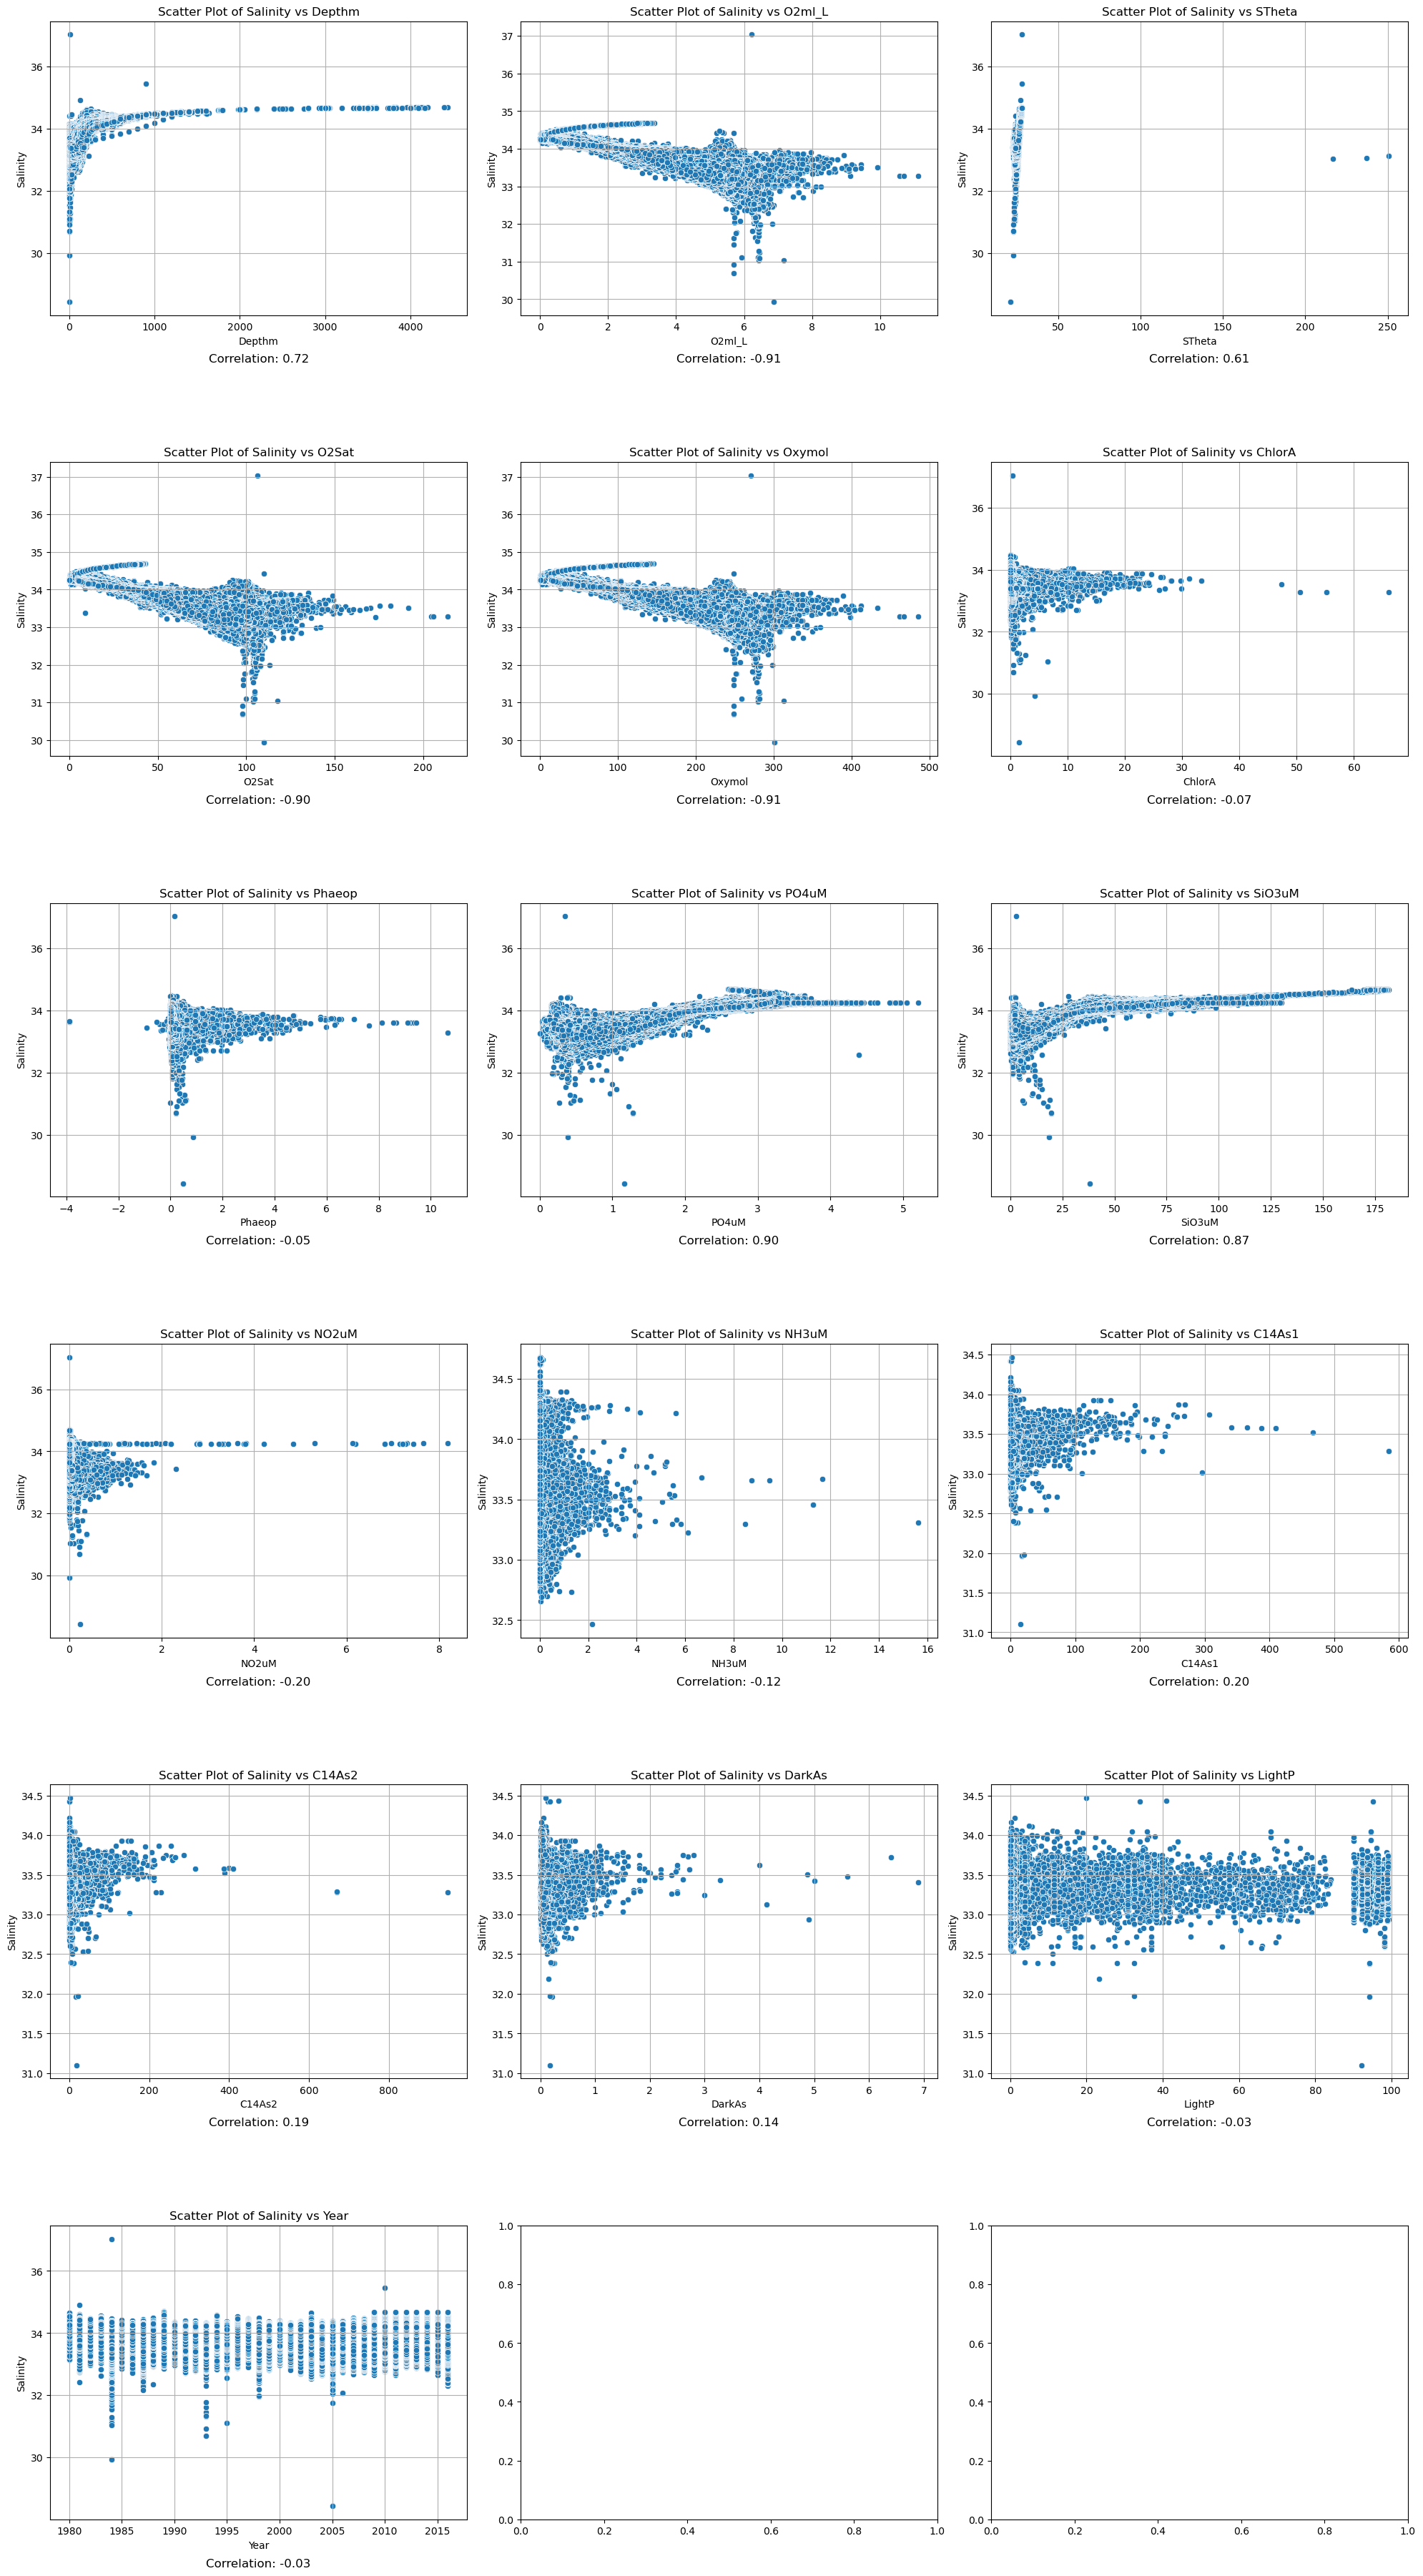

In [2]:
# List of features
features = ['Depthm', 'O2ml_L', 'STheta', 'O2Sat', 'Oxymol', 'ChlorA', 'Phaeop', 'PO4uM',
            'SiO3uM', 'NO2uM', 'NH3uM', 'C14As1', 'C14As2', 'DarkAs', 'LightP','Year']

# Calculate the number of rows needed
num_plots = len(features)
num_rows = (num_plots + 2) // 3 

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)



# Compute Pearson's correlation coefficient and plot scatter plots
for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    sns.scatterplot(x=feature, y='Salnty', data=raw_data, ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot of Salinity vs {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Salinity')
    axes[row, col].grid(True)
    
    # Calculate Pearson's correlation coefficient
    correlation = raw_data[[feature, 'Salnty']].corr().iloc[0, 1]
    
    # Annotate plot with correlation
    axes[row, col].text(0.5, -0.15, f'Correlation: {correlation:.2f}', ha='center', va='center', fontsize=12, transform=axes[row, col].transAxes)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [3]:
# Compute Pearson's correlation coefficient for each feature
correlation_results = {}
for feature in features:
    correlation = raw_data[[feature, 'Salnty']].corr().iloc[0, 1]
    correlation_results[feature] = correlation

# Print Pearson's correlation coefficients
print("Pearson's correlation coefficients:")
for feature, correlation in correlation_results.items():
    print(f'{feature}: {correlation:.2f}')

Pearson's correlation coefficients:
Depthm: 0.72
O2ml_L: -0.91
STheta: 0.61
O2Sat: -0.90
Oxymol: -0.91
ChlorA: -0.07
Phaeop: -0.05
PO4uM: 0.90
SiO3uM: 0.87
NO2uM: -0.20
NH3uM: -0.12
C14As1: 0.20
C14As2: 0.19
DarkAs: 0.14
LightP: -0.03
Year: -0.03


The scatter plots illustrate the relationship between the features and salinity level. From these plots, we can derive the Pearson correlation coefficients:

- Depthm: 0.72
- O2ml_L: -0.91
- STheta: 0.61
- O2Sat: -0.90
- Oxymol: -0.91
- ChlorA: -0.07
- Phaeop: -0.05
- PO4uM: 0.90
- SiO3uM: 0.87
- NO2uM: -0.20
- NH3uM: -0.12
- C14As1: 0.20
- C14As2: 0.19
- DarkAs: 0.14
- LightP: -0.03
- Year: -0.03

Features with higher absolute correlation coefficients are more indicative of the salinity level.

For instance, O2ml_L(-0.91), Oxymol(-0.91), and O2Sat(-0.90) exhibit strong negative correlations with salinity, indicating that as their values decrease, salinity tends to increase.

Conversely, SiO3uM(0.87) and PO4uM(0.90) display strong positive correlations with salinity, suggesting that higher values correspond to increased salinity levels.


Therefore, **O2ml_L, O2Sat, Oxymol, SiO3uM, and PO4uM** are the most predictive features of the salinity level.

## Part 2:

Computing matrix $C ∈ R^{16×16}$ that contains the Pearson’s correlation coefficients between all pairs of features and visualizing the matrix C using a heatmap.

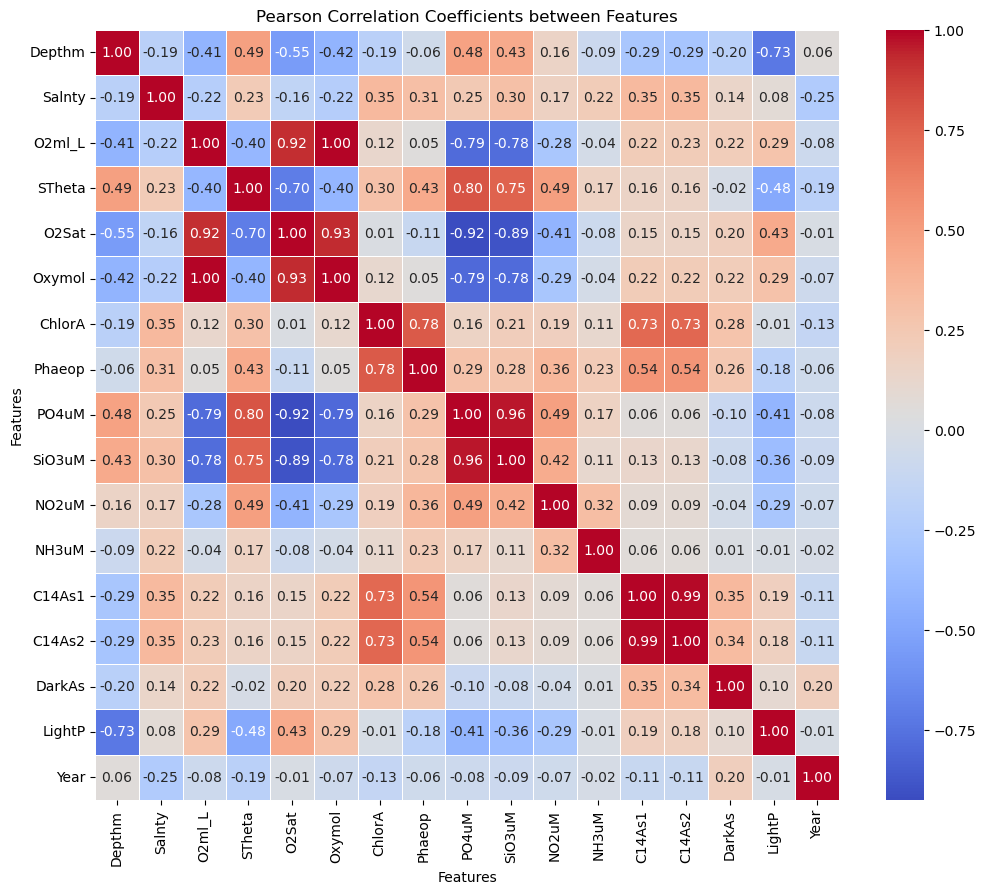

In [4]:
corr_data = raw_data.dropna()
# Compute Pearson's correlation matrix
correlation_matrix = corr_data.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Coefficients between Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [5]:
raw_data.columns

Index(['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxymol', 'ChlorA',
       'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NH3uM', 'C14As1', 'C14As2',
       'DarkAs', 'LightP', 'Year'],
      dtype='object')

## Features that are the most correlated to each other

Upon analyzing the heatmap, several features exhibit notable correlations, both positively and negatively.

Positively correlated features:

- **'C14As1' and 'C14As2':** These features exhibit high positive correlation of 0.99, indicating a strong relationship between them.
- **'PO4uM' and 'SiO3uM':** With a correlation coefficient of 0.96, these features display a significant positive correlation, suggesting a close association between phosphate and silicate concentrations.
- **'O2Sat' and 'Oxymol':** These features demonstrate a positive correlation of 0.93, implying a relationship between oxygen saturation and oxygen micromoles per kilogram of seawater.
- **'O2ml_L' and 'O2Sat':** With a correlation coefficient of 0.92, there exists a positive correlation between oxygen milliliters per liter of seawater and oxygen saturation.


Negatively correlated features:

- **'PO4uM' and 'O2Sat':** These features exhibit a strong negative correlation of -0.92, indicating an inverse relationship between phosphate concentration and oxygen saturation.
- **'O2Sat' and 'SiO3uM':** With a correlation coefficient of -0.89, a significant negative correlation exists between oxygen saturation and silicate concentration.
- **'Oxymol' and 'SiO3uM':** These features display a moderate negative correlation of -0.78, suggesting a relationship between oxygen micromoles per kilogram of seawater and silicate concentration.
- **'Oxymol' and 'PO4uM':** With a correlation coefficient of -0.79, there is a negative correlation between oxygen micromoles per kilogram of seawater and phosphate concentration.

## Part 3:

### Data Cleaning:



#### Handling Null Values:

In [6]:
# Check null values
raw_data.isnull().sum()

Depthm         0
Salnty      3270
O2ml_L     26357
STheta      5510
O2Sat      26964
Oxymol     26970
ChlorA    116829
Phaeop    116832
PO4uM      35625
SiO3uM     34752
NO2uM      37090
NH3uM     260319
C14As1    310849
C14As2    310867
DarkAs    302632
LightP    306630
Year           0
dtype: int64

#### Visualizing Null-Values

<Axes: >

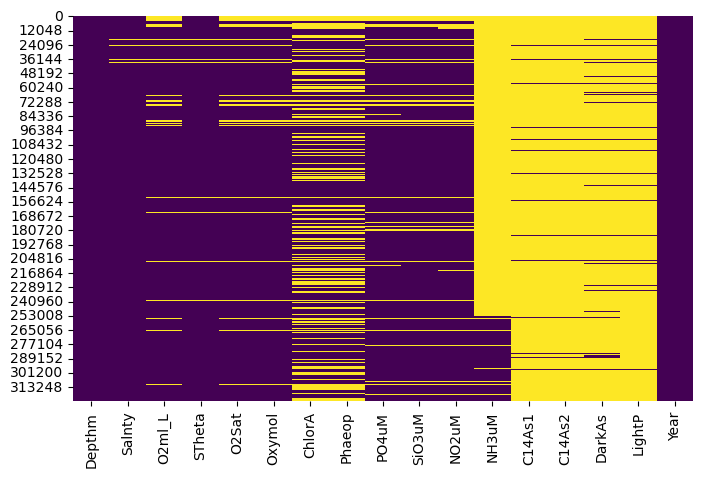

In [7]:
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(raw_data.isna(),cbar=False,cmap='viridis')

The plot reveals that several features exhibit a notable prevalence of null values. Here's a list of features with their corresponding Pearson's correlation coefficients:

- ChlorA: -0.07
- Phaeop: -0.05
- NH3uM: -0.12
- C14As1: 0.20
- C14As2: 0.19
- DarkAs: 0.14
- LightP: -0.03

The Pearson's correlation coefficients for these features are significantly low, suggesting that they have minimal correlation with the target variable. Therefore, dropping them from the analysis could be warranted.

In [8]:
# List of columns to drop
columns_to_drop = ['ChlorA', 'Phaeop', 'NH3uM', 'C14As1', 'C14As2', 'DarkAs', 'LightP']

# Drop the columns from the dataset
data = raw_data.drop(columns=columns_to_drop)
data.head()

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,PO4uM,SiO3uM,NO2uM,Year
0,0,33.418,NaN,24.287,NaN,NaN,NaN,NaN,NaN,1980
1,10,33.419,NaN,24.302,NaN,NaN,NaN,NaN,NaN,1980
2,20,33.420,NaN,24.318,NaN,NaN,NaN,NaN,NaN,1980
3,30,33.400,NaN,24.410,NaN,NaN,NaN,NaN,NaN,1980
4,40,33.380,NaN,24.470,NaN,NaN,NaN,NaN,NaN,1980


From the reduced features, further analysing,

- Depthm: 0.72
- O2ml_L: -0.91
- STheta: 0.61
- O2Sat: -0.90
- Oxymol: -0.91
- PO4uM: 0.90
- SiO3uM: 0.87
- NO2uM: -0.20

We can see that NO2uM has a very low pearson's correlation coefficients. so we can drop it.

In [9]:
data.drop(columns='NO2uM', inplace= True)
data.head()

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,PO4uM,SiO3uM,Year
0,0,33.418,NaN,24.287,NaN,NaN,NaN,NaN,1980
1,10,33.419,NaN,24.302,NaN,NaN,NaN,NaN,1980
2,20,33.420,NaN,24.318,NaN,NaN,NaN,NaN,1980
3,30,33.400,NaN,24.410,NaN,NaN,NaN,NaN,1980
4,40,33.380,NaN,24.470,NaN,NaN,NaN,NaN,1980


We can drop rows where the response variable `salnty` has null values.

In [10]:
# Drop rows where 'Salnty' is null
data.dropna(subset=['Salnty'], inplace=True)

In [11]:
data.isna().sum()

Depthm        0
Salnty        0
O2ml_L    23312
STheta     2240
O2Sat     23694
Oxymol    23700
PO4uM     33167
SiO3uM    32297
Year          0
dtype: int64

#### Dropping features where all features are NULL values

In [12]:
# Count the number of null values in each row
null_counts_per_row = data.isnull().sum(axis=1)

# Create a boolean mask to identify rows with six null values
rows_to_drop = null_counts_per_row[null_counts_per_row == 6].index

# Drop rows where six features are null
filtered_data = data.drop(index=rows_to_drop)
filtered_data.shape

(320199, 9)

<Axes: >

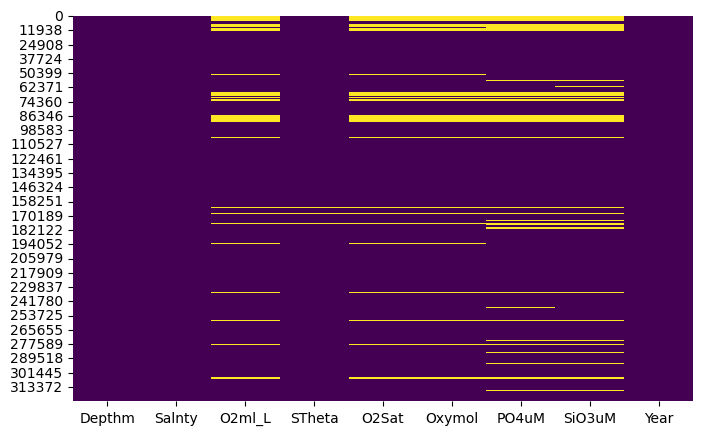

In [13]:
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(data.isna(),cbar=False,cmap='viridis')

### Filling Null Values with Linear Interpolation

From the plot, we can see that many columns have null values. In the process of preparing our dataset for analysis, one crucial step is to handle missing or null values appropriately.

Linear interpolation is a commonly used technique for filling missing values in time series data for several reasons:

- Time series data typically exhibits a sequential order based on time intervals. Linear interpolation maintains this temporal order by estimating missing values based on adjacent data points, ensuring that the continuity of the time series is preserved.

- Linear interpolation is a straightforward method that can be easily implemented using built-in functions in libraries such as pandas. It offers a computationally efficient solution for filling missing values, making it suitable for large datasets with missing entries.

- By interpolating missing values using linear interpolation, the overall trends and patterns present in the time series data are preserved to some extent. This allows for meaningful analysis and interpretation of the data, even in the presence of missing observations.

In [14]:
data.index = pd.to_datetime(data.index)

# Use linear interpolation to fill null values
data_interpolated = data.interpolate(method='linear')

# Check if there are still any null values remaining
print("Number of remaining null values after interpolation:")
print(data_interpolated.isnull().sum())
data_interpolated['Year'].unique()

Number of remaining null values after interpolation:
Depthm       0
Salnty       0
O2ml_L    4068
STheta       0
O2Sat     4068
Oxymol    4068
PO4uM     4068
SiO3uM    4068
Year         0
dtype: int64


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [15]:
# Group by year and column, and calculate the sum of null values
null_values_per_year_col = data_interpolated.groupby(['Year']).apply(lambda x: x.isnull().sum())

# Print the result
print("Number of null values in each column for every year:")
print(null_values_per_year_col)


Number of null values in each column for every year:
      Depthm  Salnty  O2ml_L  STheta  O2Sat  Oxymol  PO4uM  SiO3uM  Year
Year                                                                    
1980       0       0    1224       0   1224    1224   1224    1224     0
1981       0       0    2844       0   2844    2844   2844    2844     0
1982       0       0       0       0      0       0      0       0     0
1983       0       0       0       0      0       0      0       0     0
1984       0       0       0       0      0       0      0       0     0
1985       0       0       0       0      0       0      0       0     0
1986       0       0       0       0      0       0      0       0     0
1987       0       0       0       0      0       0      0       0     0
1988       0       0       0       0      0       0      0       0     0
1989       0       0       0       0      0       0      0       0     0
1990       0       0       0       0      0       0      0       0     

Upon examination, it appears that there are null values present in the initial years, specifically 1980 and 1981. This occurrence arises because, during the application of linear interpolation, the initial values are also null, which inhibits their proper interpretation. Therefore, we can drop these rows from the dataset to ensure the accuracy of our analysis.

In [16]:
# drop the rown in the year 1980 and 1981
data_without_null = data_interpolated.dropna()

In [17]:
data_without_null.isnull().sum()

Depthm    0
Salnty    0
O2ml_L    0
STheta    0
O2Sat     0
Oxymol    0
PO4uM     0
SiO3uM    0
Year      0
dtype: int64

In [18]:
data_without_null.head()

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,PO4uM,SiO3uM,Year
1970-01-01 00:00:00.000004070,0,33.673,6.03,23.947,114.2,263.0017,0.18,3.4,1981
1970-01-01 00:00:00.000004071,1,33.673,6.03,23.947,114.2,263.0017,0.18,3.4,1981
1970-01-01 00:00:00.000004072,8,33.672,6.12,23.952,115.8,266.9258,0.20,3.2,1981
1970-01-01 00:00:00.000004073,10,33.637,5.74,24.131,107.0,250.3082,0.31,4.6,1981
1970-01-01 00:00:00.000004074,17,33.574,4.23,24.885,73.6,184.3249,0.79,10.5,1981


### Data Normalization Report: Min-Max Scaling

In the process of preparing our dataset for analysis, we employed data normalization techniques to ensure uniformity and consistency across different features.

**Methodology:**

**Selection of Columns:** Prior to normalization, the columns to be normalized are identified. The 'Year' column is excluded from the normalization process since it represents a temporal feature and does not require scaling.

**Min-Max Scaler:** The MinMaxScaler from the sklearn.preprocessing module is used to perform Min-Max scaling on the dataset. Min-Max scaling, also known as normalization, rescales the features to a specified range,  between 0 and 1, preserving the relative relationships between data points.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define columns to be normalized
columns_to_normalize = [col for col in data_without_null.columns if col != 'Year']

# Fit the scaler to the selected columns and transform them
data_normalized = data_without_null.copy()
data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])

# Print the first few rows of the normalized data
data_normalized.head()

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,PO4uM,SiO3uM,Year
1970-01-01 00:00:00.000004070,0.000000,0.609322,0.542190,0.013109,0.533613,0.541898,0.034549,0.018722,1981
1970-01-01 00:00:00.000004071,0.000225,0.609322,0.542190,0.013109,0.533613,0.541898,0.034549,0.018722,1981
1970-01-01 00:00:00.000004072,0.001801,0.609206,0.550269,0.013130,0.541083,0.549970,0.038388,0.017621,1981
1970-01-01 00:00:00.000004073,0.002251,0.605138,0.516158,0.013909,0.500000,0.515787,0.059501,0.025330,1981
1970-01-01 00:00:00.000004074,0.003827,0.597815,0.380610,0.017189,0.344071,0.380057,0.151631,0.057819,1981


### Split data into Train dec and test set

**Partitioning Criteria:** The specific criteria for partitioning the data into training, development, and testing sets based on the temporal aspect of the dataset. The training data encompasses samples collected between 1980 and 2010, providing a substantial historical record for model training. The development data comprises samples collected between 2011 and 2013, serving as a separate dataset for fine-tuning and validation of the model during the development phase. Lastly, the testing data consists of samples collected between 2014 and 2016, enabling the evaluation of the trained model's performance on unseen data.

In [20]:
training_data = data_normalized[(data_normalized['Year'] >= 1980) & (data_normalized['Year'] <= 2010)]
development_data = data_normalized[(data_normalized['Year'] >= 2011) & (data_normalized['Year'] <= 2013)]
testing_data = data_normalized[(data_normalized['Year'] >= 2014) & (data_normalized['Year'] <= 2016)]

# Print number of samples in each dataset
print("Number of samples in training data:", len(training_data))
print("Number of samples in development data:", len(development_data))
print("Number of samples in testing data:", len(testing_data))

Number of samples in training data: 270268
Number of samples in development data: 24222
Number of samples in testing data: 23453


In [21]:
X_train = training_data[['Depthm','O2ml_L','O2Sat','Oxymol','PO4uM','SiO3uM']]
Y_train = training_data['Salnty']
X_dev = development_data[['Depthm','O2ml_L','O2Sat','Oxymol','PO4uM','SiO3uM']]
Y_dev = development_data['Salnty']
X_test = testing_data[['Depthm','O2ml_L','O2Sat','Oxymol','PO4uM','SiO3uM']]
Y_test = testing_data['Salnty']

## Part 4:

**Predicting salinity:** 

The implemented code utilizes the ordinary least squares (OLS) solution to perform linear regression for predicting water salinity based on the considered biochemical features. The algorithm constructs a data matrix
X where each row represents a training sample and each column represents a feature, including a constant 1 for the intercept term. The OLS solution $w^*$ is computed using the formula $w = (X^T X)^{-1} X^T y$, where $X^T$ denotes the transpose of $X$ and $y$ represents the target variable (salinity values).

**Evaluation:**

the code also implements a function `evaluate` for evaluating the performance of a linear regression model. It calculates three key metrics:

**Coefficient of Determination (R^2):** This metric, denoted as $R^2$, measures the proportion of the variance in the target variable (salinity) that is explained by the linear regression model. It quantifies the goodness of fit of the model to the observed data, with values closer to 1 indicating a better fit.

**Pearson's Correlation Coefficient:** This metric calculates the linear correlation between the predicted salinity values and the true salinity values. It provides insight into the strength and direction of the linear relationship between the predicted and actual values. A correlation coefficient close to 1 indicates a strong positive linear relationship.

**Mean Absolute Error (MAE):** This metric measures the average absolute difference between the predicted and true salinity values. It provides a straightforward measure of the model's accuracy, with lower values indicating better performance.

In [22]:
def linear_regression(X_train, y_train, X_test):
    # Add a column of ones to X for the intercept term
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    # Compute the OLS solution: w* = (XT X)^-1 XT y
    weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    
    # Make predictions on the test set: y_pred = X_test * weights
    y_pred = X_test @ weights
    
    return y_pred

In [23]:
def evaluate(y_true, y_pred):
    # Calculate R^2
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    
    # Calculate Pearson's correlation coefficient
    correlation_matrix = np.corrcoef(y_true, y_pred)
    correlation = correlation_matrix[0, 1]
    
    # Calculate MAE
    mae = np.mean(np.abs(y_true - y_pred))
    
    return r_squared, correlation, mae


#### Evaluation on the Validation set:

In [24]:
# Compute the OLS solution
y_pred_dev = linear_regression(X_train, Y_train, X_dev)


# Evaluate the model
r_squared_dev, correlation_dev, mae_dev = evaluate(Y_dev, y_pred_dev)
# r_squared_test, correlation_test, mae_test = evaluate(Y_test, y_pred)

# Print the evaluation metrics
print("Development set:")
print("R^2:", r_squared_dev)
print("Pearson's correlation coefficient:", correlation_dev)
print("MAE:", mae_dev)


Development set:
R^2: 0.8612197710391144
Pearson's correlation coefficient: 0.933388371351715
MAE: 0.012830626118377151


Evaluation results observed on the Development set:

- R^2: 0.8612197710391144
- Pearson's correlation coefficient: 0.933388371351715
- MAE: 0.012830626118377151


**R^2 (Coefficient of Determination):** The value of 0.861 indicates that approximately 86.1% of the variance in the salinity values can be explained by the linear regression model.

**Pearson's Correlation Coefficient:** The high value of 0.933 suggests a strong positive linear relationship between the predicted and actual salinity values. This indicates that the model's predictions are highly correlated with the true values on the development set.

**MAE (Mean Absolute Error):** The low value of 0.0128 indicates that, on average, the model's predictions deviate from the true values by approximately 0.0128 salinity units. This suggests that the model has good accuracy in predicting salinity levels on the development set.

Overall, these results suggest that the linear regression model performs well on the development set. Now, it's essential to evaluate its performance on the testing set to ensure that it generalizes well to unseen data.

#### Evaluation on the test set:

In [25]:
# Compute the OLS solution
y_pred_test = linear_regression(X_train, Y_train, X_test)


# Evaluate the model on the test set
r_squared_test, correlation_test, mae_test = evaluate(Y_test, y_pred_test)

# Print the evaluation metrics
print("Test set:")
print("R^2:", r_squared_test)
print("Pearson's correlation coefficient:", correlation_test)
print("MAE:", mae_test)

Test set:
R^2: 0.8244573982065442
Pearson's correlation coefficient: 0.9291006107227269
MAE: 0.014893207944739174


Evaluation results observed on the Test set:

- R^2: 0.8244573982065442
- Pearson's correlation coefficient: 0.9291006107227269
- MAE: 0.014893207944739174


The test set results show similar performance metrics to those of the development set:

**R^2 (Coefficient of Determination):** The value of approximately 0.824 indicates that around 82.4% of the variance in the salinity values in the test set can be explained by the linear regression model. This value is consistent with the R^2 value obtained from the development set, suggesting that the model generalizes well to unseen data.

**Pearson's Correlation Coefficient:** The high value of approximately 0.929 indicates a strong positive linear relationship between the predicted and actual salinity values in the test set. This correlation coefficient is consistent with the values obtained from the development set, indicating that the model's predictions are highly correlated with the true values on the test set.

**MAE (Mean Absolute Error):** The MAE value of approximately 0.0149 suggests that, on average, the model's predictions deviate from the true values by approximately 0.0149 salinity units in the test set. This value is consistent with the MAE obtained from the development set, indicating that the model's accuracy is similar on both sets.

Overall, the consistency in performance metrics across the development and test sets suggests that the linear regression model performs well and generalizes effectively to unseen data. It's essential to have consistent performance across multiple datasets to ensure the reliability and robustness of the model.

## Part 5:

### Summary on the relationship between the biochemical features and water salinity

The estimated coefficients of the linear regression model provide valuable insights into the relationship between the biochemical features and water salinity. Each coefficient represents the change in the predicted salinity value for a one-unit change in the corresponding feature, assuming all other features remain constant. 

- Magnitude and Significance: The magnitude of each coefficient indicates the strength of the relationship between the feature and salinity. Larger coefficients suggest a more significant influence on salinity levels. Stakeholders can interpret the magnitude of coefficients to prioritize factors that have the most substantial impact on water salinity.

- Direction of Influence: The sign of each coefficient (positive or negative) indicates the direction of influence on salinity. A positive coefficient implies that an increase in the feature value leads to an increase in salinity, while a negative coefficient suggests the opposite. Understanding the direction of influence helps stakeholders anticipate how changes in environmental conditions or human activities may affect water salinity.

- Interpretation of Specific Coefficients: By examining individual coefficients, stakeholders can gain insights into the specific factors driving salinity variations. For example, a positive coefficient for a mineral concentration might indicate that higher mineral levels contribute to increased salinity due to mineral-rich runoff from agricultural areas or urban development.

- Relative Importance of Features: Comparing the magnitudes of coefficients allows stakeholders to assess the relative importance of different features in influencing salinity levels. Features with larger coefficients have a more significant impact on salinity and may warrant closer attention in management and decision-making processes.

In summary, the estimated coefficients of the linear regression model provide valuable insights into the relationships between biochemical features and water salinity, enabling stakeholders to make informed decisions, prioritize management actions, and develop strategies for sustainable water resource management.

## Part 6:

### Experiment with Linear Non-Linear Regression Model:

The primary objective is to identify the optimal combination of features and regression techniques for accurate salinity prediction. The study utilizes the development dataset to evaluate feature selection and model performance based on the mean absolute error (MAE) between the actual and predicted salinity values. Furthermore, the best-performing model is assessed on the test set to determine its generalization capability.

To conduct the experiments, different feature combinations and regression models are explored. The feature combinations are carefully chosen to create an informative yet non-redundant set of predictors, ensuring that the selected features are predictive of salinity while avoiding high correlation among them.

**Experimental Setup**

**Feature Combinations:** Various feature combinations are defined based on the available measurements. These combinations are selected based on the results from part 1 & 2.

**Regression Models:** Two types of regression models are employed:

- **Linear Regression:** 
- **Non-linear Regression:**

**Parameter Tuning:** For the non-linear regression model, polynomial degree serves as a hyperparameter. Grid search cross-validation is employed to identify the optimal polynomial degree for each feature combination.

Feature Selection:

Highly correlated features with response variable:
Depthm: 0.72
O2ml_L: -0.91
O2Sat: -0.90
Oxymol: -0.91
PO4uM: 0.90
SiO3uM: 0.87

We can print a correlation map for these to see which variables are corelated:

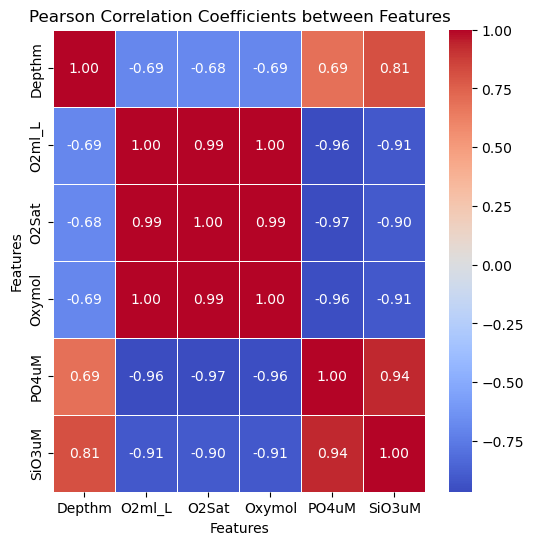

In [26]:
corr_data_ = X_train.dropna()
# Compute Pearson's correlation matrix
correlation_matrix = corr_data_.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Coefficients between Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

From the correlation graph we can see that 
- O2ml_L, O2Sat and Oxymol are highly positively corelated
- PO4uM, SiO3uM are highly positively correlated

selected features:
- 'Depthm', 'O2ml_L', 'PO4uM'
- 'Depthm', 'O2Sat', 'PO4uM'
- 'Depthm', 'Oxymol', 'PO4uM'
- 'Depthm', 'O2ml_L', 'SiO3uM'
- 'Depthm', 'O2Sat', 'SiO3uM'
- 'Depthm', 'Oxymol', 'SiO3uM'
- 'O2Sat', 'SiO3uM'
- 'O2Sat', 'PO4uM'

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define different feature combinations 
feature_combinations = [
    ['Depthm', 'O2ml_L', 'PO4uM'],
    ['Depthm', 'O2Sat', 'PO4uM'],
    ['Depthm', 'Oxymol', 'PO4uM'],
    ['Depthm', 'O2ml_L', 'SiO3uM'],
    ['Depthm', 'O2Sat', 'SiO3uM'],
    ['Depthm', 'Oxymol', 'SiO3uM'],
    ['O2Sat', 'SiO3uM'],
    ['O2Sat', 'PO4uM']
]

# Initialize models
linear_model = LinearRegression()
non_linear_model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define parameter grid for non-linear model (polynomial degree)
param_grid = {'polynomialfeatures__degree': [2, 3, 4]} 

all_maes = {}

# Iterate over each feature combination
for features in feature_combinations:
    # Prepare data
    X_train_subset = X_train[features]
    X_dev_subset = X_dev[features]

    # Train linear regression model
    linear_model.fit(X_train_subset, Y_train)
    linear_pred = linear_model.predict(X_dev_subset)
    linear_mae = mean_absolute_error(Y_dev, linear_pred)

    # Train non-linear regression model with polynomial features
    grid_search = GridSearchCV(non_linear_model, param_grid, scoring='neg_mean_absolute_error', cv=5)
    grid_search.fit(X_train_subset, Y_train)
    non_linear_pred = grid_search.predict(X_dev_subset)
    non_linear_mae = mean_absolute_error(Y_dev, non_linear_pred)

    # Store MAEs for all models and feature combinations
    all_maes[tuple(features)] = {'Linear Regression': linear_mae, 'Non-linear Regression': non_linear_mae}

    print(f"Feature Combination: {features}")
    print(f"Linear Regression MAE: {linear_mae}")
    print(f"Non-linear Regression MAE: {non_linear_mae}")
    print()

# Find the best model and feature combination
best_features, best_model_info = min(all_maes.items(), key=lambda x: min(x[1].values()))
best_model_name = min(best_model_info, key=best_model_info.get)
best_mae = min(best_model_info.values())
best_model = linear_model if best_model_name == 'Linear Regression' else grid_search.best_estimator_

# Print the best feature combination and model's MAE
print(f"Best Feature Combination: {best_features}")
print(f"Best Model: {best_model_name}")
print(f"Best MAE on Development Data: {best_mae}")

# Evaluate the best model on the test set
best_features_list = list(best_features)
X_test_subset = X_test[best_features_list]
best_model.fit(X_train[best_features_list], Y_train)
test_pred = best_model.predict(X_test_subset)
test_mae = mean_absolute_error(Y_test, test_pred)
print(f"MAE on Test Set: {test_mae}")

Feature Combination: ['Depthm', 'O2ml_L', 'PO4uM']
Linear Regression MAE: 0.013410731066259996
Non-linear Regression MAE: 0.012419979429782927

Feature Combination: ['Depthm', 'O2Sat', 'PO4uM']
Linear Regression MAE: 0.013875909638146099
Non-linear Regression MAE: 0.012380236529902888

Feature Combination: ['Depthm', 'Oxymol', 'PO4uM']
Linear Regression MAE: 0.01340607018869414
Non-linear Regression MAE: 0.012388974058649499

Feature Combination: ['Depthm', 'O2ml_L', 'SiO3uM']
Linear Regression MAE: 0.013824879770333514
Non-linear Regression MAE: 0.011792916122164852

Feature Combination: ['Depthm', 'O2Sat', 'SiO3uM']
Linear Regression MAE: 0.014189169596348169
Non-linear Regression MAE: 0.011801985893544567

Feature Combination: ['Depthm', 'Oxymol', 'SiO3uM']
Linear Regression MAE: 0.013817023750973234
Non-linear Regression MAE: 0.011795831582480695

Feature Combination: ['O2Sat', 'SiO3uM']
Linear Regression MAE: 0.013135498217046857
Non-linear Regression MAE: 0.011757070331884091

Fe

Based on the experiments conducted with different feature combinations using linear and non-linear regression models, the mean absolute error (MAE) results on the development data are as follows:

- Feature Combination: ['Depthm', 'O2ml_L', 'PO4uM']
    - Linear Regression MAE: 0.013410731066259996
    - Non-linear Regression MAE: 0.012419979429782927

- Feature Combination: ['Depthm', 'O2Sat', 'PO4uM']
    - Linear Regression MAE: 0.013875909638146099
    - Non-linear Regression MAE: 0.012380236529902888

- Feature Combination: ['Depthm', 'Oxymol', 'PO4uM']
    - Linear Regression MAE: 0.01340607018869414
    - Non-linear Regression MAE: 0.012388974058649499

- Feature Combination: ['Depthm', 'O2ml_L', 'SiO3uM']
    - Linear Regression MAE: 0.013824879770333514
    - Non-linear Regression MAE: 0.011792916122164852

- Feature Combination: ['Depthm', 'O2Sat', 'SiO3uM']
    - Linear Regression MAE: 0.014189169596348169
    - Non-linear Regression MAE: 0.011801985893544567

- Feature Combination: ['Depthm', 'Oxymol', 'SiO3uM']
    - Linear Regression MAE: 0.013817023750973234
    - Non-linear Regression MAE: 0.011795831582480695

- Feature Combination: ['O2Sat', 'SiO3uM']
    - Linear Regression MAE: 0.013135498217046857
    - Non-linear Regression MAE: 0.011757070331884091

- Feature Combination: ['O2Sat', 'PO4uM']
    - Linear Regression MAE: 0.013285374798701692
    - Non-linear Regression MAE: 0.011939907183378552

- Best Feature Combination: ('O2Sat', 'SiO3uM')
    - Best Model: Non-linear Regression
    - Best MAE on Development Data: 0.011757070331884091
    - MAE on Test Set: 0.01276318093299549


The best performing feature combination is ['O2Sat', 'SiO3uM'] with a non-linear regression model, which achieved an MAE of 0.011757070331884091 on the development data. When evaluated on the test set, the MAE of the selected model was 0.01276318093299549.

## Part 7:

The aim is to classify samples based on their salinity levels using logistic regression. To preprocess the data for classification, we first binarize the salinity data by assigning samples with salinity values larger than the sample mean to class 1 and those with salinity values lower than the mean to class -1. This binarization simplifies the classification problem into distinguishing between two classes: salinity levels above and below the mean.

The logistic regression algorithm is then utilized to build a predictive model based on the provided features, namely 'Depthm', 'O2ml_L', 'O2Sat', 'Oxymol', 'PO4uM', and 'SiO3uM'. To optimize the logistic regression model's performance, hyperparameter tuning is conducted using the development dataset. Grid search approach with 5-fold cross-validation is applied to determine the optimal values for the regularization strength ('C') and the regularization penalty term ('penalty'). The performance metric used for hyperparameter tuning is classification accuracy.

After hyperparameter tuning, we evaluate the accuracy of the classifier on the test dataset using the best combination of hyperparameters identified during the development phase.


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Binarize the salinity data based on the sample mean
data_bin = data_normalized
salinity_mean = data_bin['Salnty'].mean()
data_bin['Class'] = np.where(data_bin['Salnty'] > salinity_mean, 1, -1)

# split into train, dev and test set:
training_data_bin = data_bin[(data_bin['Year'] >= 1980) & (data_bin['Year'] <= 2010)]
development_data_bin = data_bin[(data_bin['Year'] >= 2011) & (data_bin['Year'] <= 2013)]
testing_data_bin = data_bin[(data_bin['Year'] >= 2014) & (data_bin['Year'] <= 2016)]


X_train_bin = training_data_bin[['Depthm','O2ml_L','O2Sat','Oxymol','PO4uM','SiO3uM']]
Y_train_bin = training_data_bin['Class']
X_dev_bin = development_data_bin[['Depthm','O2ml_L','O2Sat','Oxymol','PO4uM','SiO3uM']]
Y_dev_bin = development_data_bin['Class']
X_test_bin = testing_data_bin[['Depthm','O2ml_L','O2Sat','Oxymol','PO4uM','SiO3uM']]
Y_test_bin = testing_data_bin['Class']


# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2']  # Regularization penalty term
}

# Perform grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_dev_bin, Y_dev_bin)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train_bin, Y_train_bin)

# Print accuracy for all models
print("Accuracy for all models:")
for params, mean_score, std_score in zip(
    grid_search.cv_results_['params'],
    grid_search.cv_results_['mean_test_score'],
    grid_search.cv_results_['std_test_score']
):
    print(f"Hyperparameters: {params} | Mean Accuracy: {mean_score} | Std Accuracy: {std_score}")
    
# Evaluate the classifier's accuracy on the development data
dev_accuracy = accuracy_score(Y_dev_bin, best_logistic_regression.predict(X_dev_bin))
print(f"Accuracy on Development Data (Best Model): {dev_accuracy}")



# Evaluate the classifier's accuracy on the test data
test_accuracy = accuracy_score(Y_test_bin, best_logistic_regression.predict(X_test_bin))
print('best params : ',best_params)
print(f"Accuracy on Test Data (Best Model): {test_accuracy}")

Accuracy for all models:
Hyperparameters: {'C': 0.001, 'penalty': 'l2'} | Mean Accuracy: 0.9629674833121566 | Std Accuracy: 0.012408503618621976
Hyperparameters: {'C': 0.01, 'penalty': 'l2'} | Mean Accuracy: 0.9599949636075908 | Std Accuracy: 0.01049266578747278
Hyperparameters: {'C': 0.1, 'penalty': 'l2'} | Mean Accuracy: 0.960861964499825 | Std Accuracy: 0.010217893854428362
Hyperparameters: {'C': 1, 'penalty': 'l2'} | Mean Accuracy: 0.9646189513225429 | Std Accuracy: 0.00994962793969515
Hyperparameters: {'C': 10, 'penalty': 'l2'} | Mean Accuracy: 0.9708114301394424 | Std Accuracy: 0.009134082252323589
Accuracy on Development Data (Best Model): 0.9604078936504005
best params :  {'C': 10, 'penalty': 'l2'}
Accuracy on Test Data (Best Model): 0.9598345627425063


Based on the results obtained:

- Accuracy on Development Data (Best Model): The logistic regression model achieved an accuracy of approximately 96.04% on the development data, indicating its effectiveness in predicting the binary classes based on the provided features.

- Accuracy for all models: Hyperparameter tuning was conducted using grid search with 5-fold cross-validation. The mean accuracy scores for different combinations of regularization strength (C) and penalty term (penalty) were evaluated. Among the tested hyperparameters, the model with {'C': 10, 'penalty': 'l2'} achieved the highest mean accuracy of approximately 94.00%.

- Best Hyperparameters: The best hyperparameters identified for the logistic regression model were {'C': 10, 'penalty': 'l2'}, indicating a regularization strength of 10 with an 'l2' penalty term.

- Accuracy on Test Data (Best Model): The logistic regression model, trained with the best hyperparameters, achieved an accuracy of approximately 95.98% on the test data, confirming its robust performance in generalizing to unseen data.